# Summary of Quantum Operations 

 In this section we will go into the different operations that are available in Qiskit Terra. These are:
- Single-qubit quantum gates
- Multi-qubit quantum gates
- Measurements
- Reset
- Conditionals
- State initialization

We will also show you how to use the three different simulators:
- unitary_simulator
- qasm_simulator
- statevector_simulator

In [1]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

## Multi-Qubit Gates

### Mathematical Preliminaries

The space of quantum computer grows exponential with the number of qubits. For $n$ qubits the complex vector space has dimensions $d=2^n$. To describe states of a multi-qubit system, the tensor product is used to "glue together" operators and basis vectors.

Let's start by considering a 2-qubit system. Given two operators $A$ and $B$ that each act on one qubit, the joint operator $A \otimes B$ acting on two qubits is

$$\begin{equation}
	A\otimes B = 
	\begin{pmatrix} 
		A_{00} \begin{pmatrix} 
			B_{00} & B_{01} \\
			B_{10} & B_{11}
		\end{pmatrix} & A_{01} 	\begin{pmatrix} 
				B_{00} & B_{01} \\
				B_{10} & B_{11}
			\end{pmatrix} \\
		A_{10} 	\begin{pmatrix} 
					B_{00} & B_{01} \\
					B_{10} & B_{11}
				\end{pmatrix} & A_{11} 	\begin{pmatrix} 
							B_{00} & B_{01} \\
							B_{10} & B_{11}
						\end{pmatrix}
	\end{pmatrix},						
\end{equation}$$

where $A_{jk}$ and $B_{lm}$ are the matrix elements of $A$ and $B$, respectively.

Analogously, the basis vectors for the 2-qubit system are formed using the tensor product of basis vectors for a single qubit:
$$\begin{equation}\begin{split}
	\left|{00}\right\rangle &= \begin{pmatrix} 
		1 \begin{pmatrix} 
			1  \\
			0
		\end{pmatrix} \\
		0 \begin{pmatrix} 
			1  \\
			0 
		\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\0 \end{pmatrix}~~~\left|{01}\right\rangle = \begin{pmatrix} 
	1 \begin{pmatrix} 
	0 \\
	1
	\end{pmatrix} \\
	0 \begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\end{split}
\end{equation}$$
    
$$\begin{equation}\begin{split}\left|{10}\right\rangle = \begin{pmatrix} 
	0\begin{pmatrix} 
	1  \\
	0
	\end{pmatrix} \\
	1\begin{pmatrix} 
	1 \\
	0 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}~~~ 	\left|{11}\right\rangle = \begin{pmatrix} 
	0 \begin{pmatrix} 
	0  \\
	1
	\end{pmatrix} \\
	1\begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\1 \end{pmatrix}\end{split}
\end{equation}.$$

Note we've introduced a shorthand for the tensor product of basis vectors, wherein $\left|0\right\rangle \otimes \left|0\right\rangle$ is written as $\left|00\right\rangle$. The state of an $n$-qubit system can described using the $n$-fold tensor product of single-qubit basis vectors. Notice that the basis vectors for a 2-qubit system are 4-dimensional; in general, the basis vectors of an $n$-qubit sytsem are $2^{n}$-dimensional, as noted earlier.

### Basis vector ordering in Qiskit

Within the physics community, the qubits of a multi-qubit systems are typically ordered with the first qubit on the left-most side of the tensor product and the last qubit on the right-most side. For instance, if the first qubit is in state $\left|0\right\rangle$ and second is in state $\left|1\right\rangle$, their joint state would be $\left|01\right\rangle$. Qiskit uses a slightly different ordering of the qubits, in which the qubits are represented from the most significant bit (MSB) on the left to the least significant bit (LSB) on the right (big-endian). This is similar to bitstring representation on classical computers, and enables easy conversion from bitstrings to integers after measurements are performed. For the example just given, the joint state would be represented as $\left|10\right\rangle$. Importantly, _this change in the representation of multi-qubit states affects the way multi-qubit gates are represented in Qiskit_, as discussed below.

The representation used in Qiskit enumerates the basis vectors in increasing order of the integers they represent. For instance, the basis vectors for a 2-qubit system would be ordered as $\left|00\right\rangle$, $\left|01\right\rangle$, $\left|10\right\rangle$, and $\left|11\right\rangle$. Thinking of the basis vectors as bit strings, they encode the integers 0,1,2 and 3, respectively.


### Controlled operations on qubits

A common multi-qubit gate involves the application of a gate to one qubit, conditioned on the state of another qubit. For instance, we might want to flip the state of the second qubit when the first qubit is in $\left|0\right\rangle$. Such gates are known as _controlled gates_. The standard multi-qubit gates consist of two-qubit gates and three-qubit gates. The two-qubit gates are:
- controlled Pauli gates
- controlled Hadamard gate
- controlled rotation gates
- controlled phase gate
- controlled u3 gate
- swap gate

The three-qubit gates are: 
- Toffoli gate 
- Fredkin gate

## Three-qubit gates


There are two commonly-used three-qubit gates. For three qubits, the basis vectors are ordered as

$$\left|000\right\rangle, \left|001\right\rangle, \left|010\right\rangle, \left|011\right\rangle, \left|100\right\rangle, \left|101\right\rangle, \left|110\right\rangle, \left|111\right\rangle,$$

which, as bitstrings, represent the integers $0,1,2,\cdots, 7$. Again, Qiskit uses a representation in which the first qubit is on the right-most side of the tensor product and the third qubit is on the left-most side:

$$\left|abc\right\rangle : \underset{\text{qubit 2}}{\left|a\right\rangle}\otimes \underset{\text{qubit 1}}{\left|b\right\rangle}\otimes \underset{\text{qubit 0}}{\left|c\right\rangle}.$$

### Toffoli gate ($ccx$ gate)

The [Toffoli gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Toffoli_(CCNOT)_gate) flips the third qubit if the first two qubits (LSB) are both $\left|1\right\rangle$:

$$\left|abc\right\rangle \rightarrow \left|bc\oplus a\right\rangle \otimes \left|b\right\rangle \otimes \left|c\right\rangle.$$

In matrix form, the Toffoli gate is
$$
C_{CX} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{pmatrix}.
$$

In [50]:
q = QuantumRegister(3)

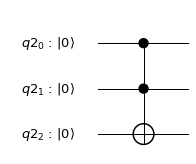

In [51]:
qc = QuantumCircuit(q)
qc.ccx(q[0], q[1], q[2])
qc.draw(output='mpl')

In [53]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

### Controlled swap gate (Fredkin Gate)

The [Fredkin gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Fredkin_(CSWAP)_gate), or the _controlled swap gate_, exchanges the second and third qubits if the first qubit (LSB) is $\left|1\right\rangle$:

$$ \left|abc\right\rangle \rightarrow \begin{cases} \left|bac\right\rangle~~\text{if}~c=1 \cr \left|abc\right\rangle~~\text{if}~c=0 \end{cases}.$$

In matrix form, the Fredkin gate is

$$
C_{\mathrm{SWAP}} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}.
$$

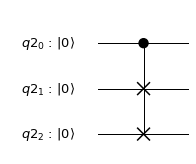

In [52]:
qc = QuantumCircuit(q)
qc.cswap(q[0], q[1], q[2])
qc.draw(output='mpl')

In [53]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

-------------

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

UsageError: Line magic function `%qiskit_version_table` not found.


This code is a part of Qiskit
© Copyright IBM 2017, 2019.

This code is licensed under the Apache License, Version 2.0. You may
obtain a copy of this license in the LICENSE.txt file in the root directory
of this source tree or at http://www.apache.org/licenses/LICENSE-2.0.

Any modifications or derivative works of this code must retain this
copyright notice, and modified files need to carry a notice indicating
that they have been altered from the originals.